<a href="https://colab.research.google.com/github/AshishUchiha-afk/10_first_ML_Projects/blob/main/spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d venky73/spam-mails-dataset

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/venky73/spam-mails-dataset
License(s): CC0-1.0


In [4]:
!unzip spam-mails-dataset.zip

Archive:  spam-mails-dataset.zip
  inflating: spam_ham_dataset.csv    


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dataset = pd.read_csv('spam_ham_dataset.csv')

#Data preprocessing

In [31]:
dataset.shape

(5171, 4)

In [32]:
dataset.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [33]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [34]:
dataset = dataset.drop(['Unnamed: 0', 'label_num'], axis=1) # Going to change label column to 0 and 1 to learn label encoding

In [35]:
dataset.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


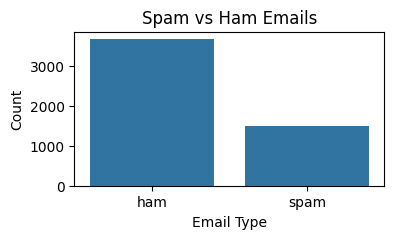

In [36]:
plt.figure(figsize=(4,2))
sns.countplot(x='label', data=dataset)
plt.title('Spam vs Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


#Label encoding

In [46]:
dataset.loc[dataset['label'] == 'spam', 'label'] = 0
dataset.loc[dataset['label'] == 'ham', 'label'] = 1

In [47]:
dataset.head()

,label,text
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...


# Spliting data and features

In [48]:
X = dataset['text']
y = dataset['label']
print(X,y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object 0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [69]:
print(X_train.shape, X_test.shape)

(4136,) (1035,)


##feature extraction - text data to feature vectors

In [70]:
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

In [84]:
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)
# Why are we doing Tfidf after spliting the data?
# To prevent data leakage we fit the data to only X_train and use this fitted data to transofrm both X_trian and X_test.
# the idf values learnt from X_train will be projected to X_test data instead of learning again from X_test.
# for example lets say there is a word "Free" in X_train after we fit and transform using tfidf it got a score of 0.7 and there is the same word 'Free' in X_test it gets the same idf score 0.7 instead of learning again
# if a word in X_train is not present in X_test that word will be ignored and if no word is present the output for X_test will be zero vector which means the given data is not good for training the model
# The model is trained on X_train, so X_test must be projected into the same feature space.
# This prevents test data from influencing model training (avoids data leakage).
#✅ New words in X_test that were not in X_train are ignored.
#✅This ensures fair evaluation, prevents data leakage, and improves generalization.


In [74]:
print(X_train_features) # a sparse matrix is a matrix which contains only non-zero elements for space optimization opposite to dense matrix
# Syntax for sparse matrix --> row, column ---- tfidf value
# point to remember is row, column are only given after assigning the words alphabetically.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 266442 stored elements and shape (4136, 42207)>
  Coords	Values
  (0, 36603)	0.04584015837643485
  (0, 16001)	0.20645649159291163
  (0, 20814)	0.46571422295538745
  (0, 4442)	0.17910626191095685
  (0, 28273)	0.19465206389701148
  (0, 939)	0.10099723286044068
  (0, 37436)	0.1840262411967105
  (0, 37281)	0.1897938578631963
  (0, 2517)	0.20040854755594367
  (0, 1)	0.382042252284824
  (0, 1810)	0.18448010785865432
  (0, 21227)	0.44060988049184924
  (0, 25006)	0.21169883445584609
  (0, 25013)	0.22906294255777448
  (0, 21138)	0.22728826318794518
  (0, 666)	0.15840563528797302
  (1, 36603)	0.01756239820781386
  (1, 16001)	0.1977453419863645
  (1, 20814)	0.44606404756608276
  (1, 4442)	0.1372392943044569
  (1, 939)	0.1160829511200511
  (1, 37436)	0.2115138064343129
  (1, 37281)	0.21814291838731084
  (1, 2517)	0.23034309922256554
  (1, 1)	0.3415276679613859
  :	:
  (4134, 30246)	0.19416005521005678
  (4134, 12074)	0.17505996600333007

In [75]:
# converting y_train and y_test to integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

#Training the model


In [78]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [79]:
X_train_prediction = model.predict(X_train_features)
train_accuracy = accuracy_score(X_train_prediction, y_train)
print(train_accuracy)

0.9963733075435203


In [80]:
X_test_prediction = model.predict(X_test_features)
test_accuracy = accuracy_score(X_test_prediction, y_test)
print(test_accuracy)

0.9874396135265701


# Predictive system

In [83]:
input_mail = ['Jumping between platforms to find resources? Not anymore.Coming soon all Partner Success Center (PSC) content is moving to the Partner Portal—everything you need, in one place. Read the FAQ ']

#converting text to feature vectors

input_data_features = vectorizer.transform(input_mail)

#making prediction

prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail
